In [1]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
from pathlib import Path
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

2025-06-28 13:51:29.903105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751118690.085784      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751118690.138883      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
female_actresses = [
    "Alia Bhatt",
    "Charlize Theron",
    "Billie Eilish",
    "Jessica Alba",
    "Priyanka Chopra",
    "Natalie Portman",
    "Elizabeth Olsen",
    "Camila Cabello",
    "Courtney Cox",
    "Ellen Degeneres",
    "Margot Robbie",
    "Anushka Sharma",
    "Lisa Kudrow",
    "Claire Holt",
    "Alexandra Daddario"
]


In [3]:
folders = []
img_data =[]
labels =[]
persons=[]
label=0
count=0
i = 0
for root, dirs, files in os.walk('/kaggle/input/face-recognition-dataset/Original Images/Original Images'):
    i += 1
    if( i== 1):
        folders = dirs
        print('i : ', i)
        print("Root:", root)
    elif  i>0 and folders[i-2] not in female_actresses and count < 4:
        j = 0
        print("-----------------------------------------------------------")
        for file_name in files:
            j +=1
            img_path = os.path.join(Path(root), file_name)
            person = folders[i-2]
            img_data.append(img_path)
            persons.append(person)
            labels.append(label)
            
            ''' 
            if( j <= 2):
                print('i : ', i)
                print("Image Path:", img_path)
                print("Person : ", person)
                print("Label:", label)
            '''
        label+=1
        count+=1
        print(f'Loop number is : {i}')
        print(f'{person} have {j} images')

i :  1
Root: /kaggle/input/face-recognition-dataset/Original Images/Original Images
-----------------------------------------------------------
Loop number is : 4
Zac Efron have 91 images
-----------------------------------------------------------
Loop number is : 9
Hrithik Roshan have 101 images
-----------------------------------------------------------
Loop number is : 10
Tom Cruise have 58 images
-----------------------------------------------------------
Loop number is : 11
Roger Federer have 77 images


In [4]:
full_dataset = list(zip(img_data, labels, persons))
random.shuffle(full_dataset)

In [5]:
img_size = (227, 227)
output_unit= 4
#output_unit = len(folders)- len(female_actresses)
print('Image shape: ', img_size)
print('output shape: ', output_unit)

Image shape:  (227, 227)
output shape:  4


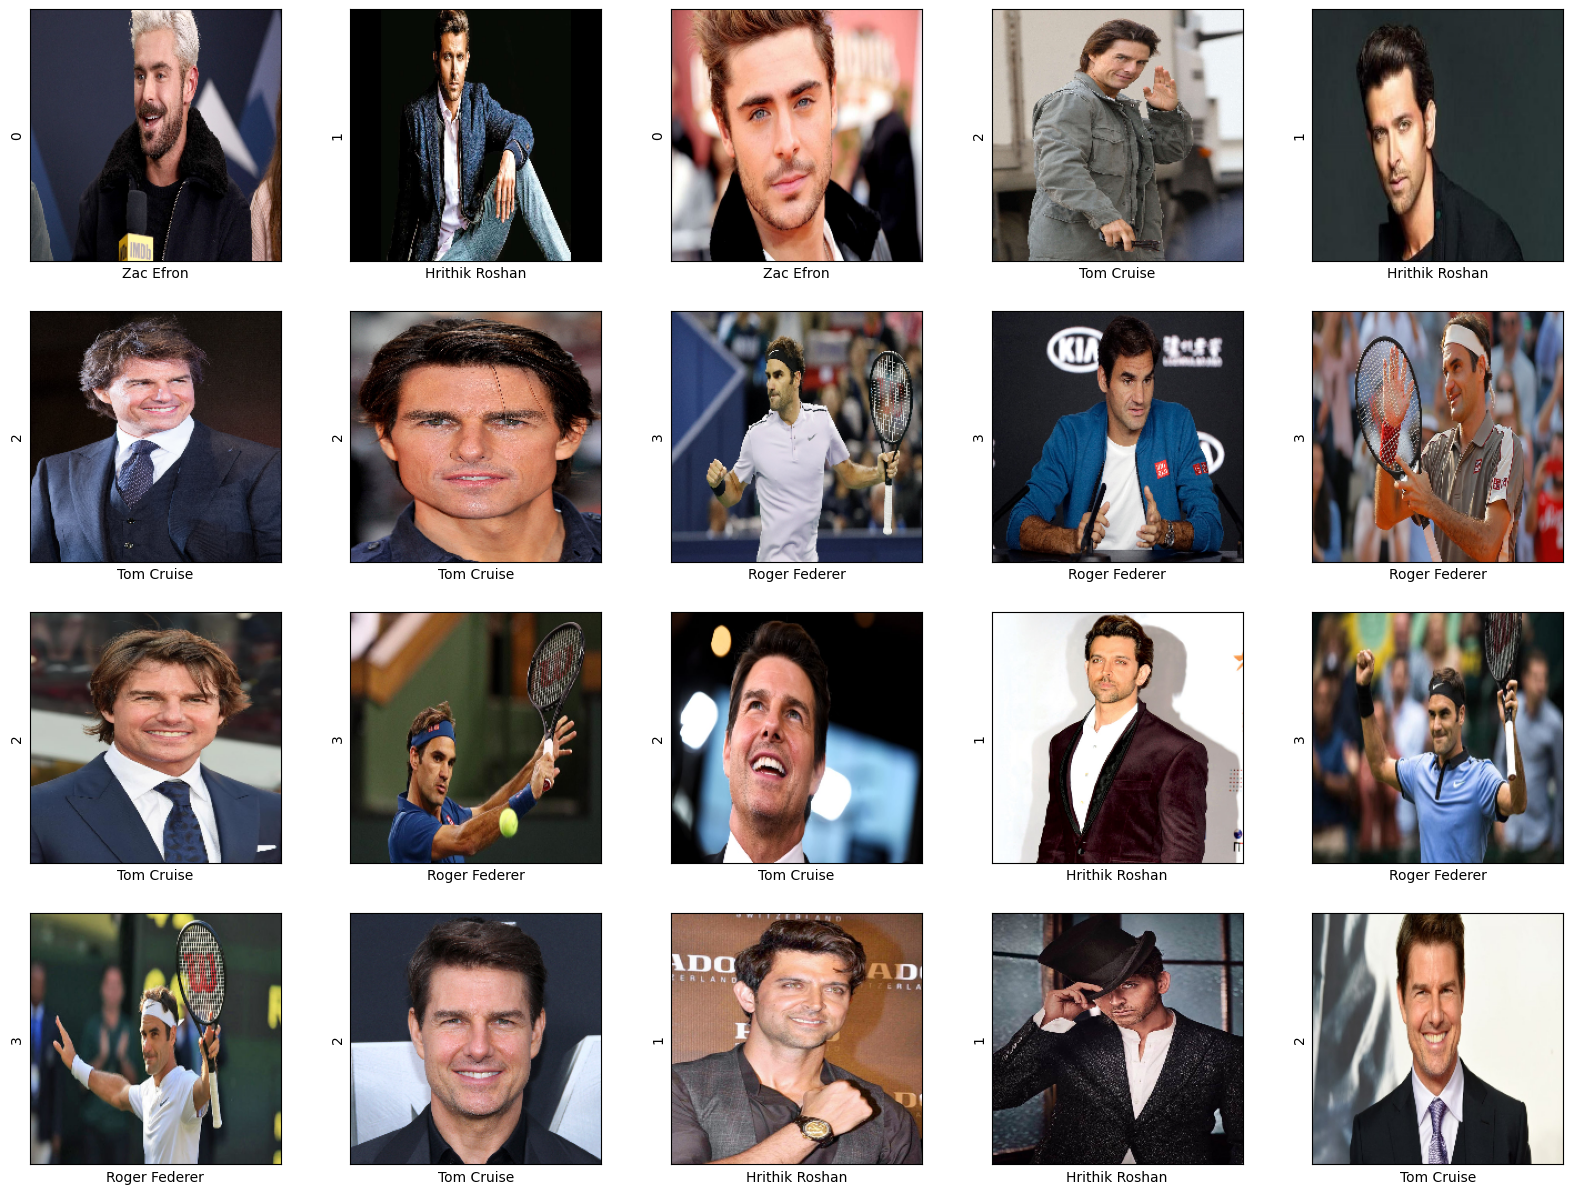

In [6]:
i = 0
plt.figure(figsize=(20,15))

for i in range(20):
    img_path, label, person = full_dataset[i]
    img_data = cv2.imread(img_path)
    img_data = cv2.resize(img_data, img_size)
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
    plt.ylabel(label)
    plt.xlabel(person)
    plt.xticks([])
    plt.yticks([])
plt.show()
    


In [7]:
X_train = []
Y_train=[]
X_test=[]
Y_test=[]
for i in range(len(full_dataset)):
    x = round(len(full_dataset)* 0.8)
    img, label, _ = full_dataset[i]
    if( i < x):
        img_data = cv2.imread(img)
        img_data = cv2.resize(img_data, img_size)
        X_train.append(img_data)
        Y_train.append(label)
    
    else:
        img_data = cv2.imread(img)
        img_data = cv2.resize(img_data, img_size)
        X_test.append(img_data)
        Y_test.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
Y_train = np.reshape(Y_train, (-1,1))

X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test = np.reshape(Y_test, (-1,1))

print("Traning image shape: ", X_train.shape)
print("Traning label shape: ", Y_train.shape)
print("Test image shape: ", X_test.shape)
print("Test label shape: ", Y_test.shape)


Traning image shape:  (262, 227, 227, 3)
Traning label shape:  (262, 1)
Test image shape:  (65, 227, 227, 3)
Test label shape:  (65, 1)


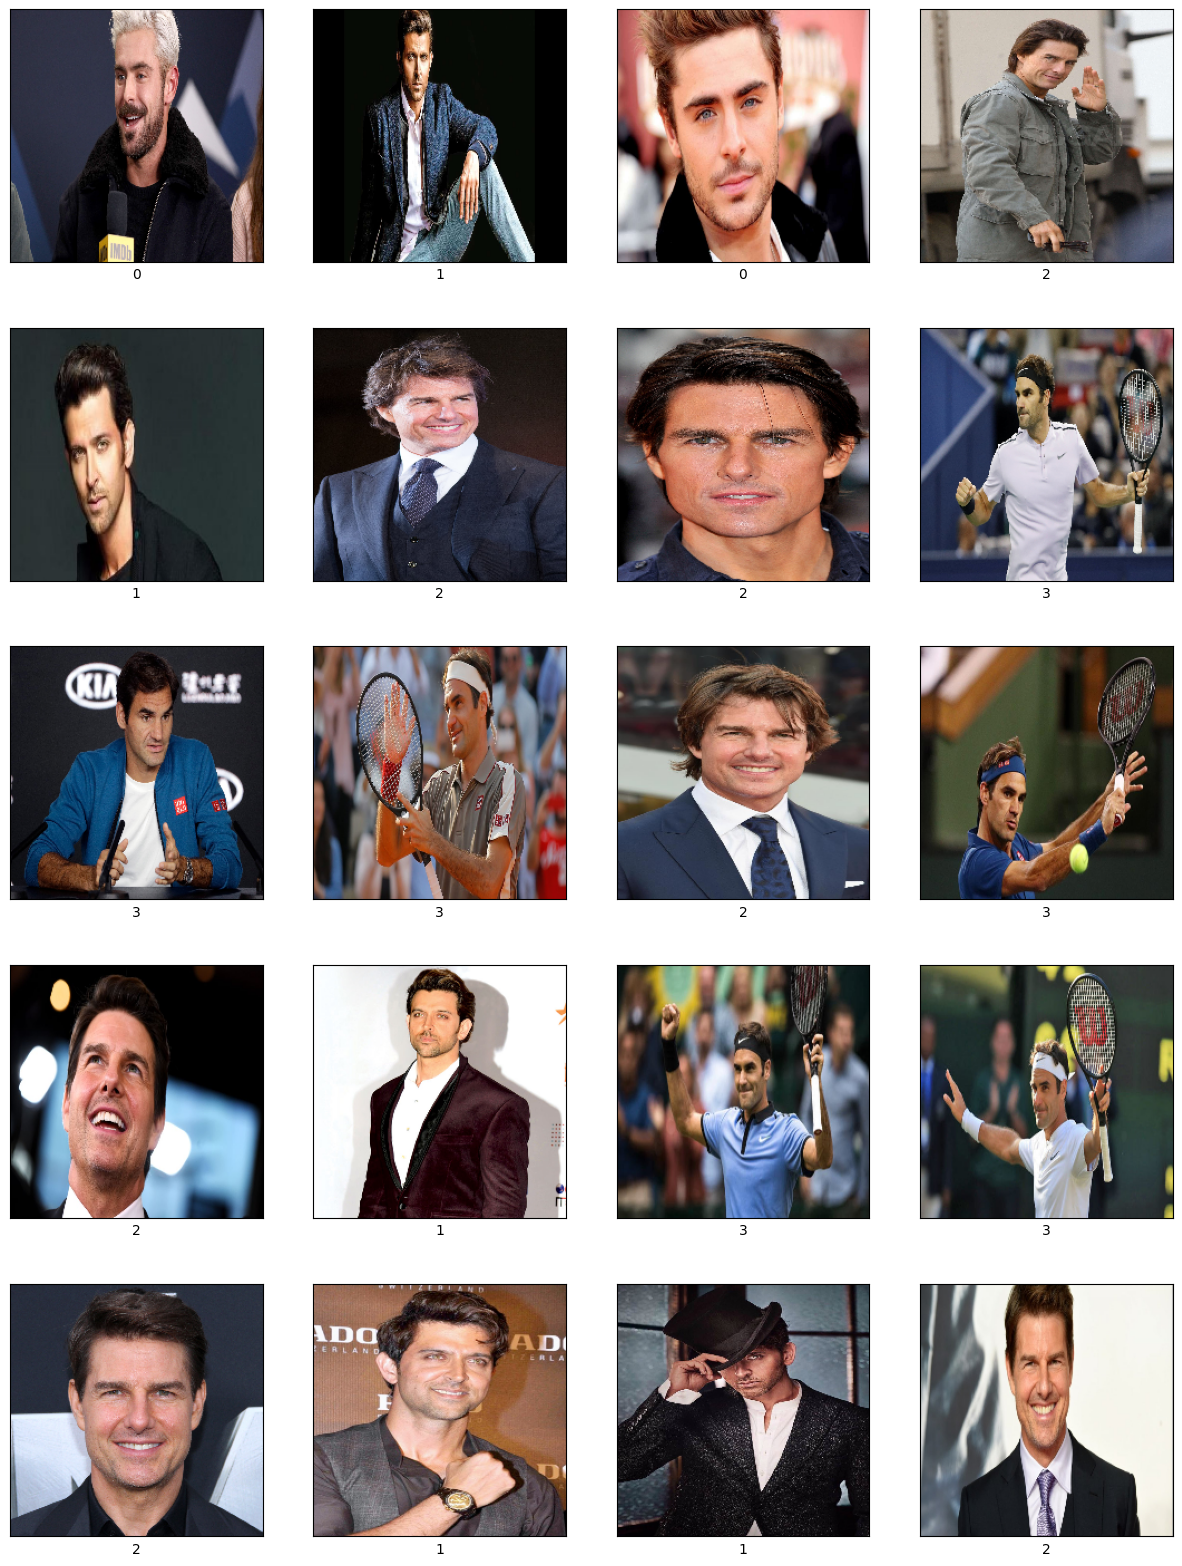

In [8]:
j= 0
plt.figure(figsize=(15,20))
for i in range(20):
    plt.subplot(5, 4,i+1)
    img = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(Y_train[i][0])

In [9]:
# Convert to float and scale to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# ImageNet mean and std (RGB order)
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std  = [0.229, 0.224, 0.225]

# Apply per-channel normalization
X_train = (X_train - imagenet_mean) / imagenet_std
X_test = (X_test - imagenet_mean) / imagenet_std


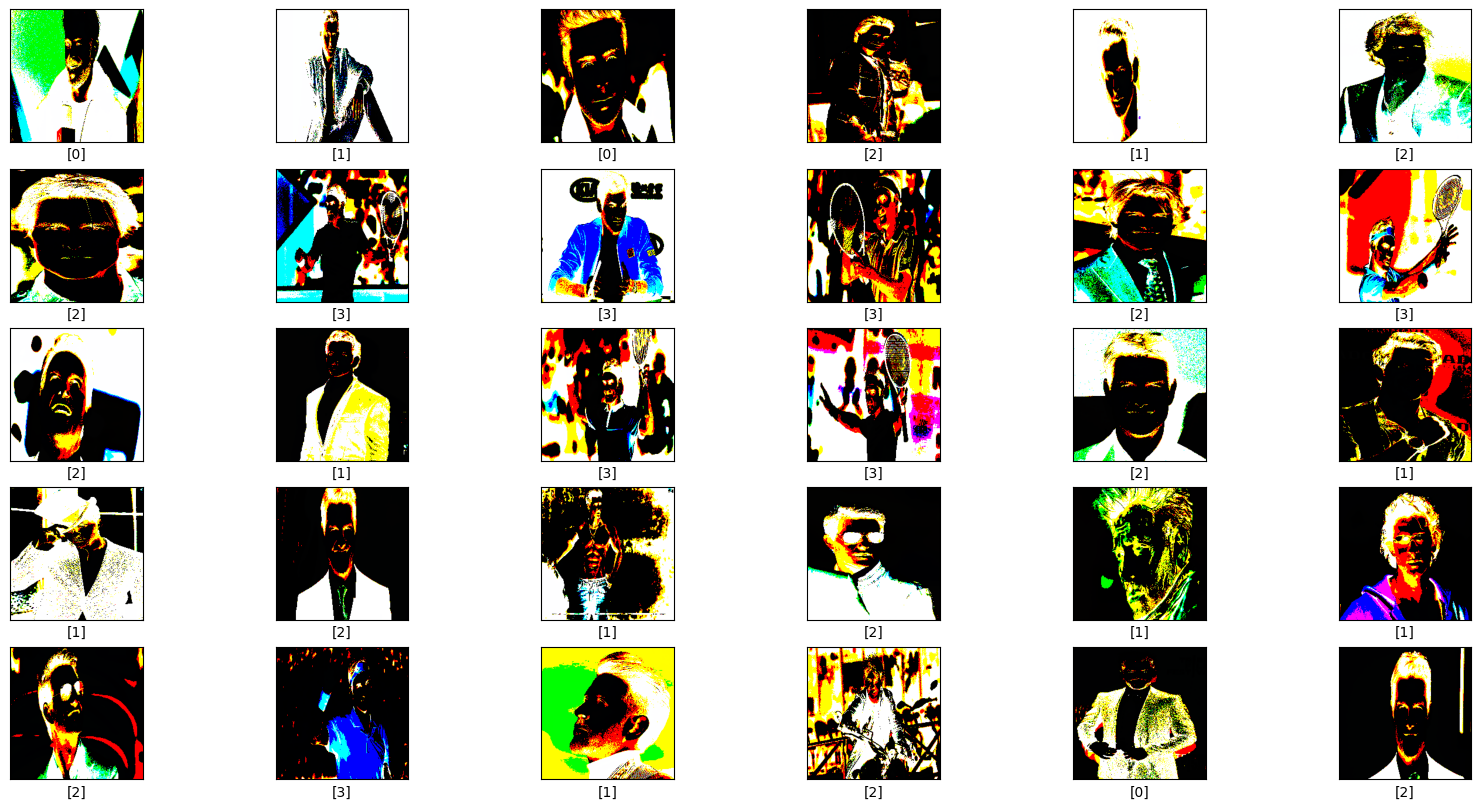

In [10]:

i = 0
plt.figure(figsize=(20,10))
for img in range(30):
    plt.subplot(5, 6, i+1)
    plt.imshow(X_train[img].astype('uint8'))
    plt.xlabel(Y_train[img])
    plt.xticks([])
    plt.yticks([])
    i +=1
plt.show()

In [11]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU : {len(gpu_device)}")

Number of GPU : 2


In [12]:
print(f"Shape of Train data : {X_train.shape} and label : {Y_train.shape}")
print(f"Shape of Test data : {X_test.shape} and label : {Y_test.shape}")

Shape of Train data : (262, 227, 227, 3) and label : (262, 1)
Shape of Test data : (65, 227, 227, 3) and label : (65, 1)


In [13]:
X_train[0].shape

(227, 227, 3)

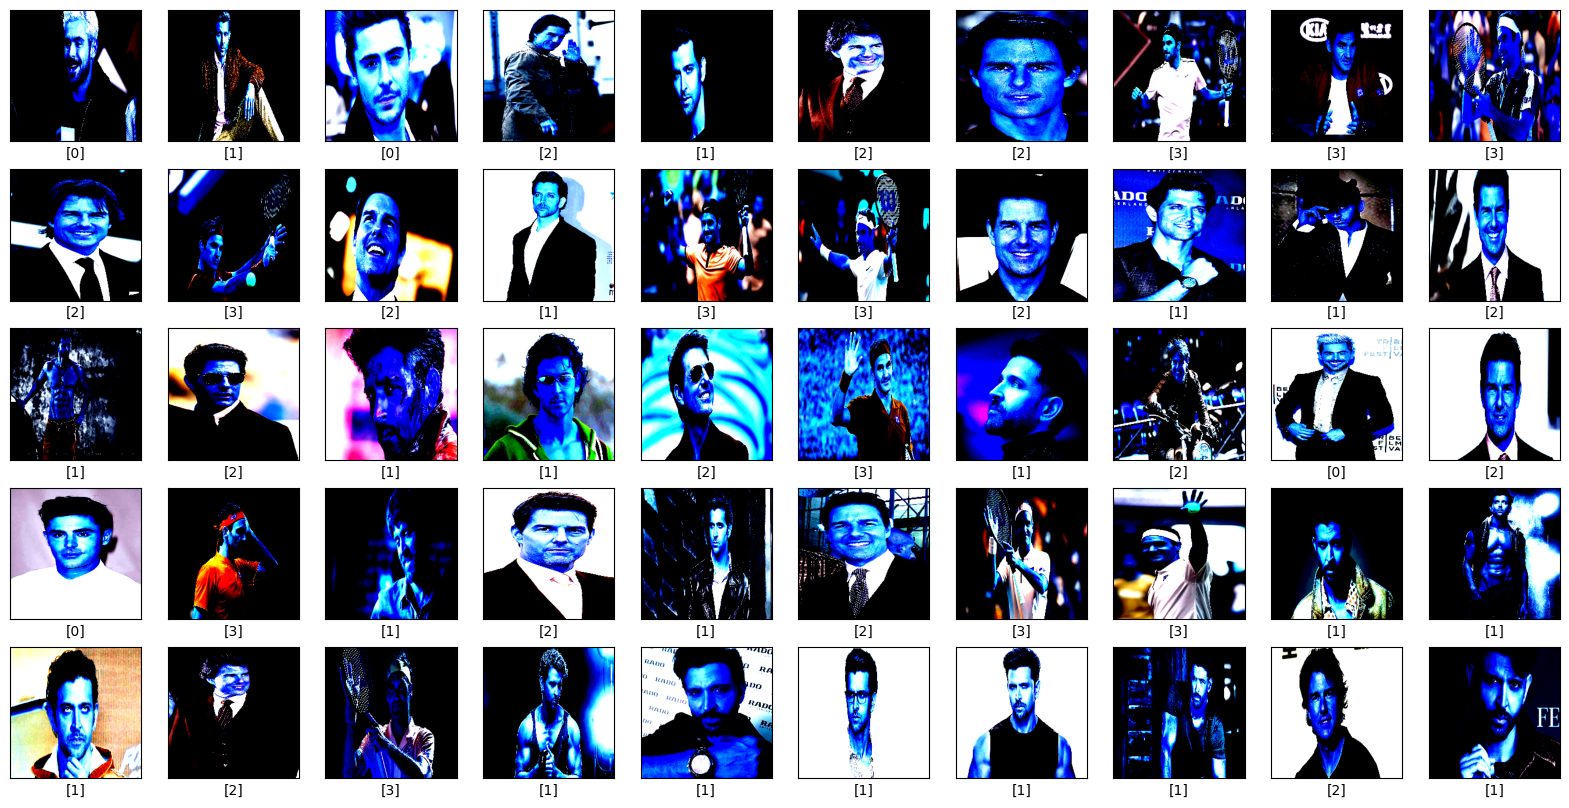

In [14]:
i = 0
plt.figure(figsize=(20,10))
for img in range(50):
    plt.subplot(5, 10, i+1)
    image = X_train[img]
    plt.imshow(image)
    plt.xlabel(Y_train[img])
    plt.xticks([])
    plt.yticks([])
    i +=1
plt.show()

In [15]:
train_mean = np.mean(X_train, axis=0)
test_mean = np.mean(X_test, axis=0)
train_mean.shape, test_mean.shape

((227, 227, 3), (227, 227, 3))

In [16]:
X_train_norm, X_test_norm = X_train , X_test 

In [17]:
X_train_norm.shape[1:]

(227, 227, 3)

In [18]:
def conv_blocks(X, filters, s=2):
    f1, f2, f3 = filters
    X_copy = X
    
    # 1st Layer
    X = layers.Conv2D(filters=f1, kernel_size=(1,1), strides=(s,s), padding='valid')(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.Activation('relu')(X)
    
    # 2nd Layer
    X = layers.Conv2D(filters=f2, kernel_size=(3,3), strides=(1,1), padding='same')(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.Activation('relu')(X) 
    
    # 3rd Layer
    X = layers.Conv2D(filters=f3, kernel_size=(1,1), strides=(1,1), padding='valid')(X)
    X = layers.BatchNormalization(axis=3)(X)
    
    ### match the dimension
    X_copy = layers.Conv2D(filters=f3, kernel_size=(1,1), strides=(s,s), padding='valid')(X_copy)
    X_copy = layers.BatchNormalization(axis=3)(X_copy)
    
    # Add the Skip COnnection
    X = layers.Add()([X, X_copy])
    X = layers.Activation('relu')(X)
    
    return X

def identity_block(X, filters):
    f1, f2, f3 = filters
    X_copy = X
    
    # 1st Layer
    X = layers.Conv2D(filters=f1, kernel_size=(1,1), strides=(1,1), padding='valid')(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.Activation('relu')(X)
    
    # 2nd Layer
    X = layers.Conv2D(filters=f2, kernel_size=(3,3), strides=(1,1), padding='same')(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.Activation('relu')(X) 
    
    # 3rd Layer
    X = layers.Conv2D(filters=f3, kernel_size=(1,1), strides=(1,1), padding='valid')(X)
    X = layers.BatchNormalization(axis=3)(X)
    
    # Add the Skip COnnection
    X = layers.Add()([X, X_copy])
    X = layers.Activation('relu')(X)
    
    return X

In [19]:
IMG_SIZE=227

In [20]:
def ResNet50():
    X_input = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    X = layers.ZeroPadding2D((3,3))(X_input)
    
    # Satge Conv1
    X = layers.Conv2D(64, (7,7), strides=(2,2))(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.Activation('relu')(X) 
    X = layers.MaxPooling2D((3,3), strides=(2,2))(X)
    
    # stage Conv2_x
    X = conv_blocks(X, filters=[64,64,256], s=1)
    X = identity_block(X, filters=[64,64,256])
    X = identity_block(X, filters=[64,64,256])
    
    # stage Conv3_x
    X = conv_blocks(X, filters=[128,128,512], s=2)
    X = identity_block(X, filters=[128,128,512])
    X = identity_block(X, filters=[128,128,512])
    X = identity_block(X, filters=[128,128,512])
    
    # stage Conv4_x
    X = conv_blocks(X, filters=[256,256,1024], s=2)
    X = identity_block(X, filters=[256,256,1024])
    X = identity_block(X, filters=[256,256,1024])
    X = identity_block(X, filters=[256,256,1024])
    X = identity_block(X, filters=[256,256,1024])
    X = identity_block(X, filters=[256,256,1024])
    
    # stage Conv5_x
    X = conv_blocks(X, filters=[512,512,2048], s=2)
    X = identity_block(X, filters=[512,512,2048])
    X = identity_block(X, filters=[512,512,2048])
    
    
    X = layers.AveragePooling2D((2,2))(X)
    X = layers.Flatten()(X)
    X = layers.Dense(output_unit, activation='softmax', kernel_initializer='he_normal')(X)
    
    model = keras.Model(inputs=X_input, outputs=X, name='ResNet50')
    
    return model
   

In [21]:
model = ResNet50()
model.summary()

I0000 00:00:1751118725.784128      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751118725.784795      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 227, 227, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 233, 233, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 114, 114, 64)   │          9,472 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 114, 114, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 114, 114, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 56, 56, 64)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 56, 56, 64)     │          4,160 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 56, 56, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 56, 56, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 56, 56, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 56, 56, 256)    │         16,640 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 56, 56, 256)    │         16,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 56, 56, 256)    │          1,024 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 56, 56, 256)    │          1,024 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 23,661,444 (90.26 MB)

 Trainable params: 23,608,324 (90.06 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [22]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [23]:

early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,           
    restore_best_weights=True  
)

h = model.fit(
    x=X_train,
    y=Y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=16
)


Epoch 1/50


I0000 00:00:1751118776.531864      64 service.cc:148] XLA service 0x7aab38004cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751118776.532559      64 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751118776.532591      64 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751118781.148500      64 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1751118798.984584      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14/14 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.2817 - loss: 10.8023 - val_accuracy: 0.2453 - val_loss: 7673.3784
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.3215 - loss: 4.0183 - val_accuracy: 0.2453 - val_loss: 764.1481
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.2546 - loss: 5.5553 - val_accuracy: 0.3396 - val_loss: 1.9935
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.2776 - loss: 6.5395 - val_accuracy: 0.3396 - val_loss: 1.4714
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.3080 - loss: 2.3021 - val_accuracy: 0.1887 - val_loss: 2.0951
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.3102 - loss: 4.3692 - val_accuracy: 0.2075 - val_loss: 3.2158
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.3572 - loss: 2.1976 - val_accuracy: 0.2075 - val_loss: 4.3922
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.2373 - loss: 2.6900 - val_accuracy: 0.1887 - 

In [24]:
train_loss = h.history['loss']
val_loss = h.history['val_loss']
train_acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

In [25]:
epoch = range(1, len(val_acc)+1)
epoch

range(1, 51)

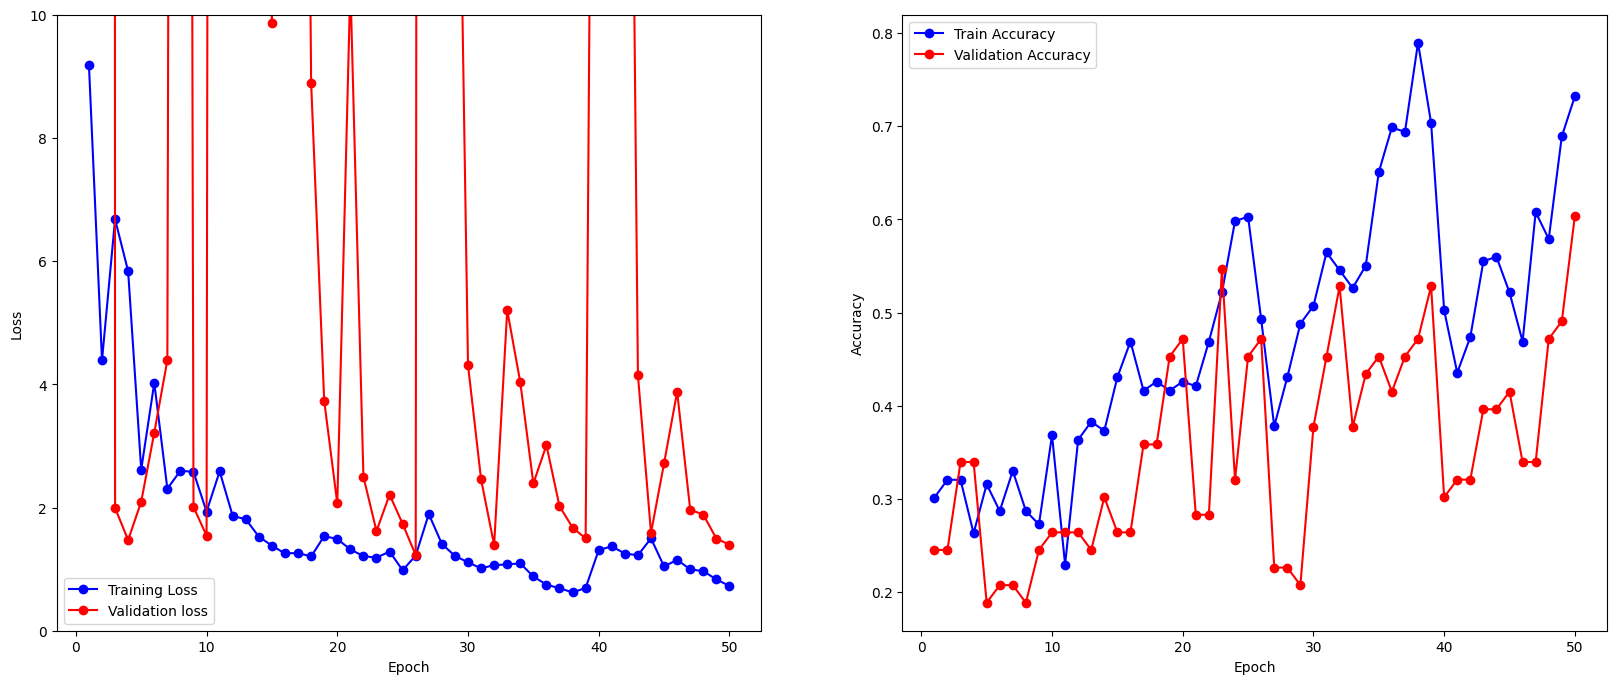

In [26]:
epoch = range(1, len(val_acc)+1)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epoch, train_loss,'bo-', label='Training Loss')
plt.plot(epoch, val_loss,'ro-', label= 'Validation loss')
plt.ylim(0,10)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_acc,'bo-', label='Train Accuracy')
plt.plot(epoch, val_acc,'ro-', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 815ms/step - accuracy: 0.5969 - loss: 1.1073

Test Accuracy: 0.6000000238418579

Test Loss: 1.1265389919281006


In [28]:
probability = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step


In [29]:
(probability[0].max() *100).round(2)

59.7

In [30]:
predicted_classes = probability[0].argmax()
predicted_classes

3

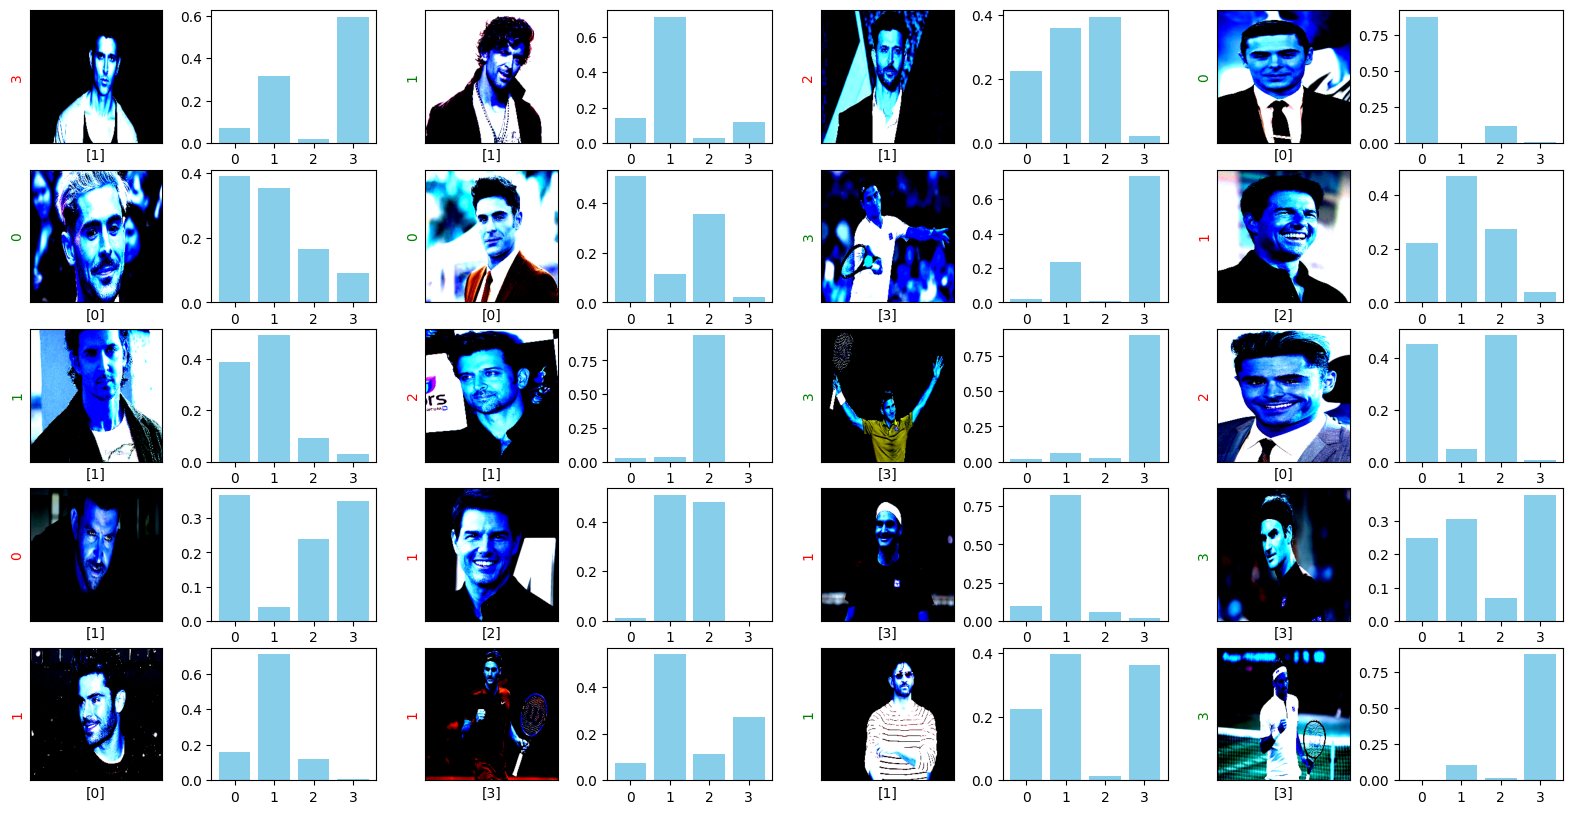

In [31]:
c=0
label=[0,1,2,3]
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,8,c+1)
    image= X_test[i]
    plt.imshow(image)
    plt.xlabel(Y_test[i])
    if(Y_test[i] == probability[i].argmax()):
        plt.ylabel(probability[i].argmax(), color='g')
    else:
        plt.ylabel(probability[i].argmax(), color='r')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5,8,c+2)
    plt.bar(range(len(probability[i])), probability[i], color='skyblue')
    plt.xticks(range(len(label)), label)
    c+=2
plt.show()
    